
# The Spark Foundation 


## Task 1 : Simple Linear Regression

### By: Eka Agustina
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [108]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [4]:
data = pd.read_csv('student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
# Amount of data
data.shape

(25, 2)

There are 25 rows data and 2 column

In [9]:
# data statistics
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


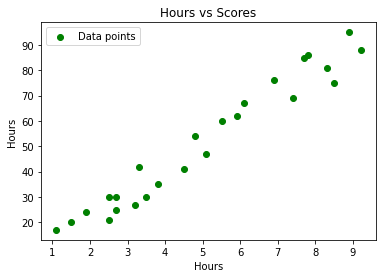

In [154]:
# plot to see relationship of the 2 variable
plt.scatter(x='Hours',y='Scores', data=data, label='Data points', c='Green')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Hours')
plt.legend()
plt.show()

Graph above shows that there is linear relationship between 2 variable

### Split Data

In [94]:
X = data['Hours'].values.reshape(-1, 1)
y = data['Scores'].values.reshape(-1, 1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [142]:
print('X:', X.shape, 'y:',y.shape)
print('X_train:', X_train.shape, 'X_test:',X_test.shape, 'y_train:',y_train.shape, 'y_test:',y_test.shape)

X: (25, 1) y: (25, 1)
X_train: (20, 1) X_test: (5, 1) y_train: (20, 1) y_test: (5, 1)


### Model Training

In [97]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

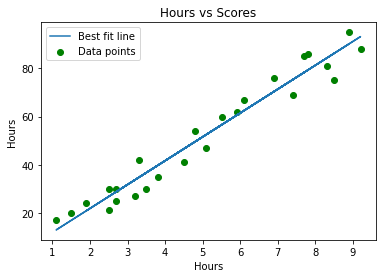

In [158]:
#get regression line using the model
reg_line = model.predict(X_train.reshape(-1,1))


plt.scatter(x='Hours',y='Scores', data=data, label='Data points', c='Green')
plt.plot(X_train,reg_line, label='Best fit line' )
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Hours')
plt.legend()
plt.show()

### Model Evaluation

In [98]:
y_pred = model.predict(X_test)

In [100]:
metrics.mean_absolute_error(y_pred,y_test)

4.183859899002982

In [166]:
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [174]:
comparison = pd.DataFrame(zip(y_test,y_pred), columns =['Actual', 'Predicted'])
comparison

,Actual,Predicted
0,[20],[16.884144762398023]
1,[27],[33.732260779489835]
2,[69],[75.35701799818725]
3,[30],[26.79480124304026]
4,[62],[60.491033277223885]


### Making Prediction

In [161]:
hours = 9.25

arr_hours = np.array(hours).reshape(-1,1)

score_pred = model.predict(arr_hours)

print('Hours:', hours)
print('Predicted Scores:',score_pred[0][0] )

Hours: 9.25
Predicted Scores: 93.69173248737539


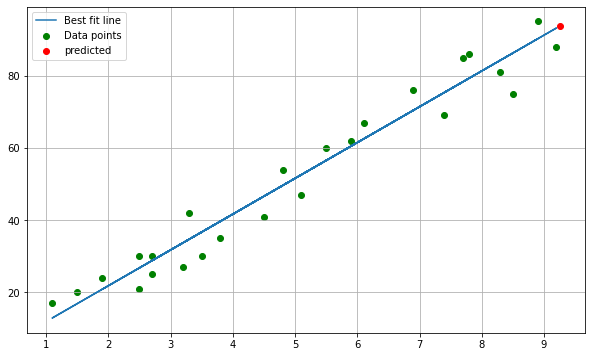

In [180]:
plt.figure(figsize=(10,6))
plt.scatter(x='Hours',y='Scores', data=data, label='Data points', c='Green')
plt.scatter(hours, score_pred, label='predicted',c='Red')
plt.plot(X_train,reg_line, label='Best fit line' )
plt.grid()
plt.legend()